In [1]:
import matplotlib.pyplot as plt
from collections import deque
import heapq
from copy import deepcopy
from IPython import display
from time import sleep

In [2]:
def dijkstra(graph, S, E, remove_node=[]):
    graph[S][1] = 0
    graph[S][2] = 0
    hq = [[0, S]]
    
    # visualize set----------------------------------------------------------------
    plt.figure(figsize=(24,12))
    plt.xlim(-1, 6)
    plt.ylim(-1, 3)
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)
    
    plt.plot(0, 0, 'k.', markersize=30)
    plt.plot(0, 2, 'k.', markersize=30)
    plt.plot(2, 2, 'k.', markersize=30)
    plt.plot(2, 0, 'k.', markersize=30)
    
    plt.text(-0.7, 0, 'Node 1', fontsize=20)
    plt.text(-0.7, 2, 'Node 2', fontsize=20)
    plt.text(2.3, 2, 'Node 3', fontsize=20)
    plt.text(2.3, 0, 'Node 4', fontsize=20)
    
    can_move_cnt = 0
    is_min_dist_cnt = 0
    
    display.display(plt.gcf())
    sleep(1)
    # visualize set----------------------------------------------------------------
    
    while hq:
        now_dist, now_num = heapq.heappop(hq)
        if now_dist > graph[now_num][1]:
            continue
        for node in graph[now_num][0]:
            next_num, dist = node
            if next_num in remove_node:
                continue
            next_dist = now_dist + dist
            
            # visualize set----------------------------------------------------------------
            display.clear_output(wait=True)
            plt.plot([data_to_idx[now_num][0], data_to_idx[next_num][0]], \
                     [data_to_idx[now_num][1], data_to_idx[next_num][1]], \
                    'r--')
            
            plt.text(3, 2-0.2*can_move_cnt, f'can move [{now_num} to {next_num}]', color='red', fontsize=20)
            can_move_cnt += 1
            
            display.display(plt.gcf())
            sleep(1)
            # visualize set----------------------------------------------------------------
    
            if next_dist < graph[next_num][1]:
            
                # visualize set----------------------------------------------------------------
                display.clear_output(wait=True)
                plt.plot([data_to_idx[now_num][0], data_to_idx[next_num][0]], \
                         [data_to_idx[now_num][1], data_to_idx[next_num][1]], \
                        'b-', linewidth=10)
                
                plt.text(4.2, 2-0.2*is_min_dist_cnt, f'[{now_num} to {next_num}] is min dist', color='blue', fontsize=20)
                is_min_dist_cnt += 1
                
                display.display(plt.gcf())
                sleep(1)
                # visualize set----------------------------------------------------------------
                
                if next_num != E:
                    heapq.heappush(hq, [next_dist, next_num])
                graph[next_num][1] = next_dist
                graph[next_num][2] = now_num
            elif next_dist == graph[next_num][1]:
                graph[next_num][2] = min([now_num, graph[next_num][2]])
            
    return graph

In [3]:
# N, M = map(int, input().split())
N, M = [4, 5]

In [4]:
graph = [[[], float('inf'), 0] for _ in range(N+1)]
# for i in range(M):
#     A, B, C = map(int, input().split())
#     graph[A][0].append([B, C])
#     graph[B][0].append([A, C])
data_list = [
    [1, 2, 1],
    [1, 3, 1],
    [2, 3, 1],
    [2, 4, 1],
    [3, 4, 1]
]


# visualize set----------------------------------------------------------------
data_to_idx = {
    1:[0, 0],
    2:[0, 2],
    3:[2, 2],
    4:[2, 0]
}
# visualize set----------------------------------------------------------------


for A, B, C in data_list:
    graph[A][0].append([B, C])
    graph[B][0].append([A, C])

In [5]:
# S, E = map(int, input().split())
S, E = [1, 4]

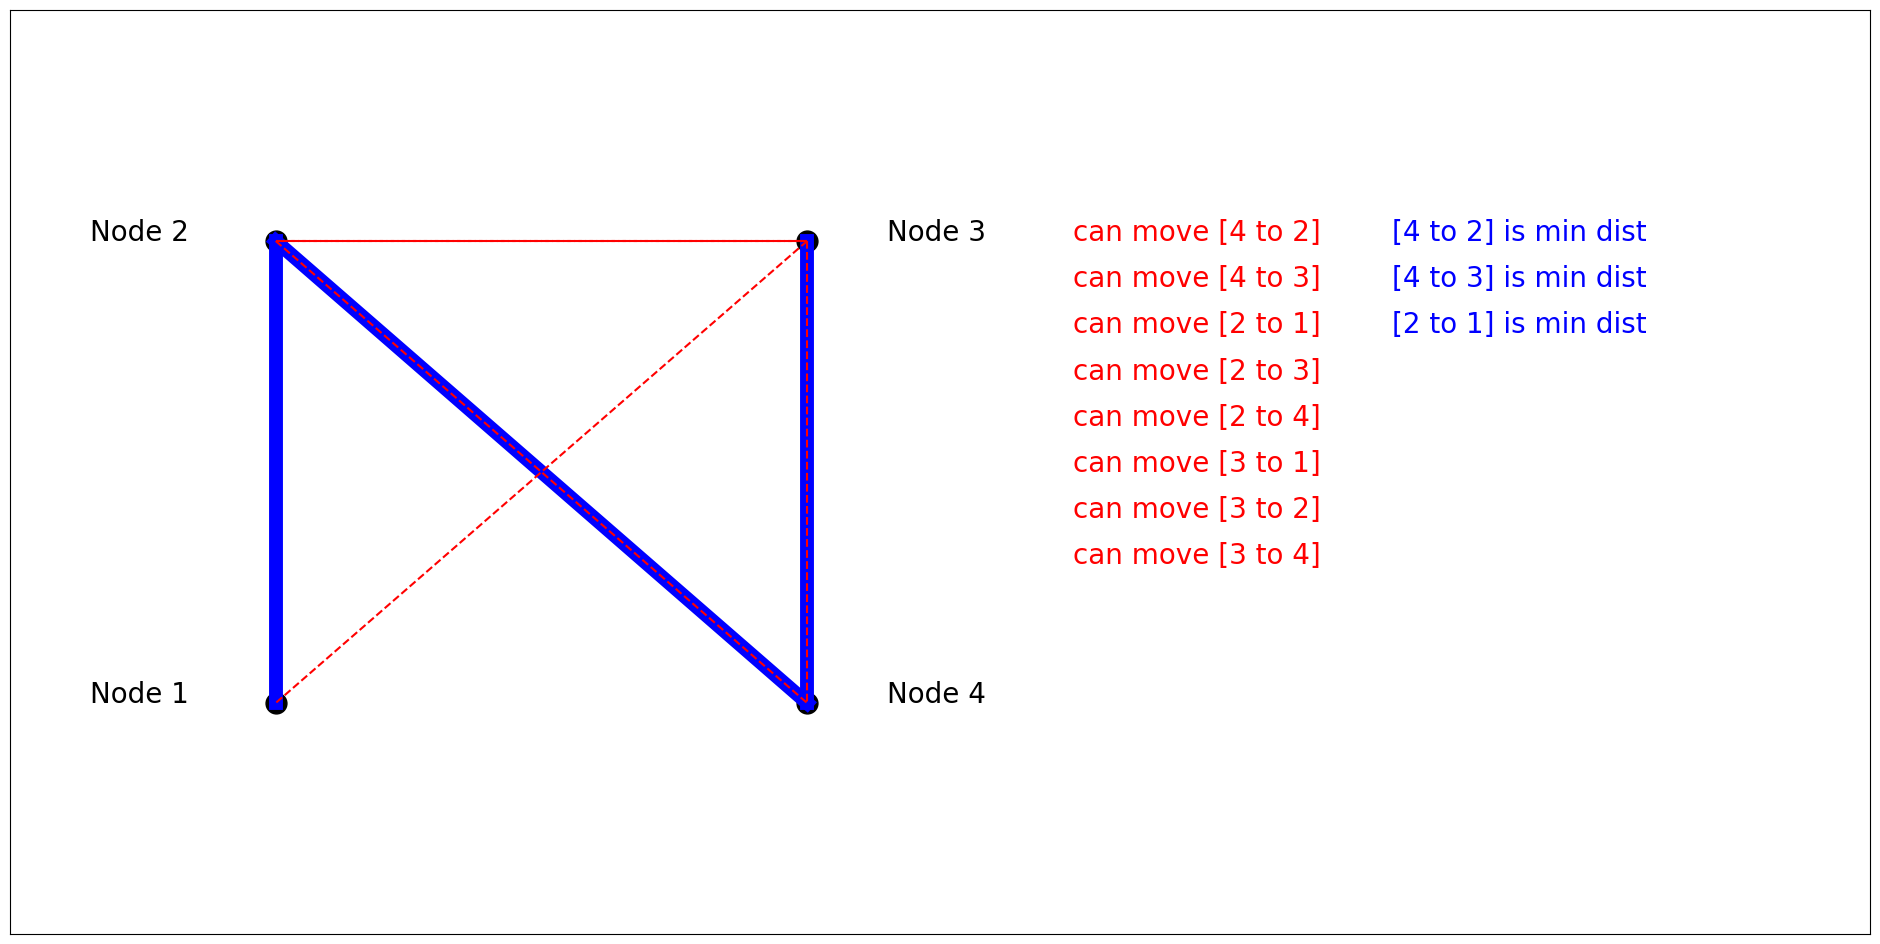

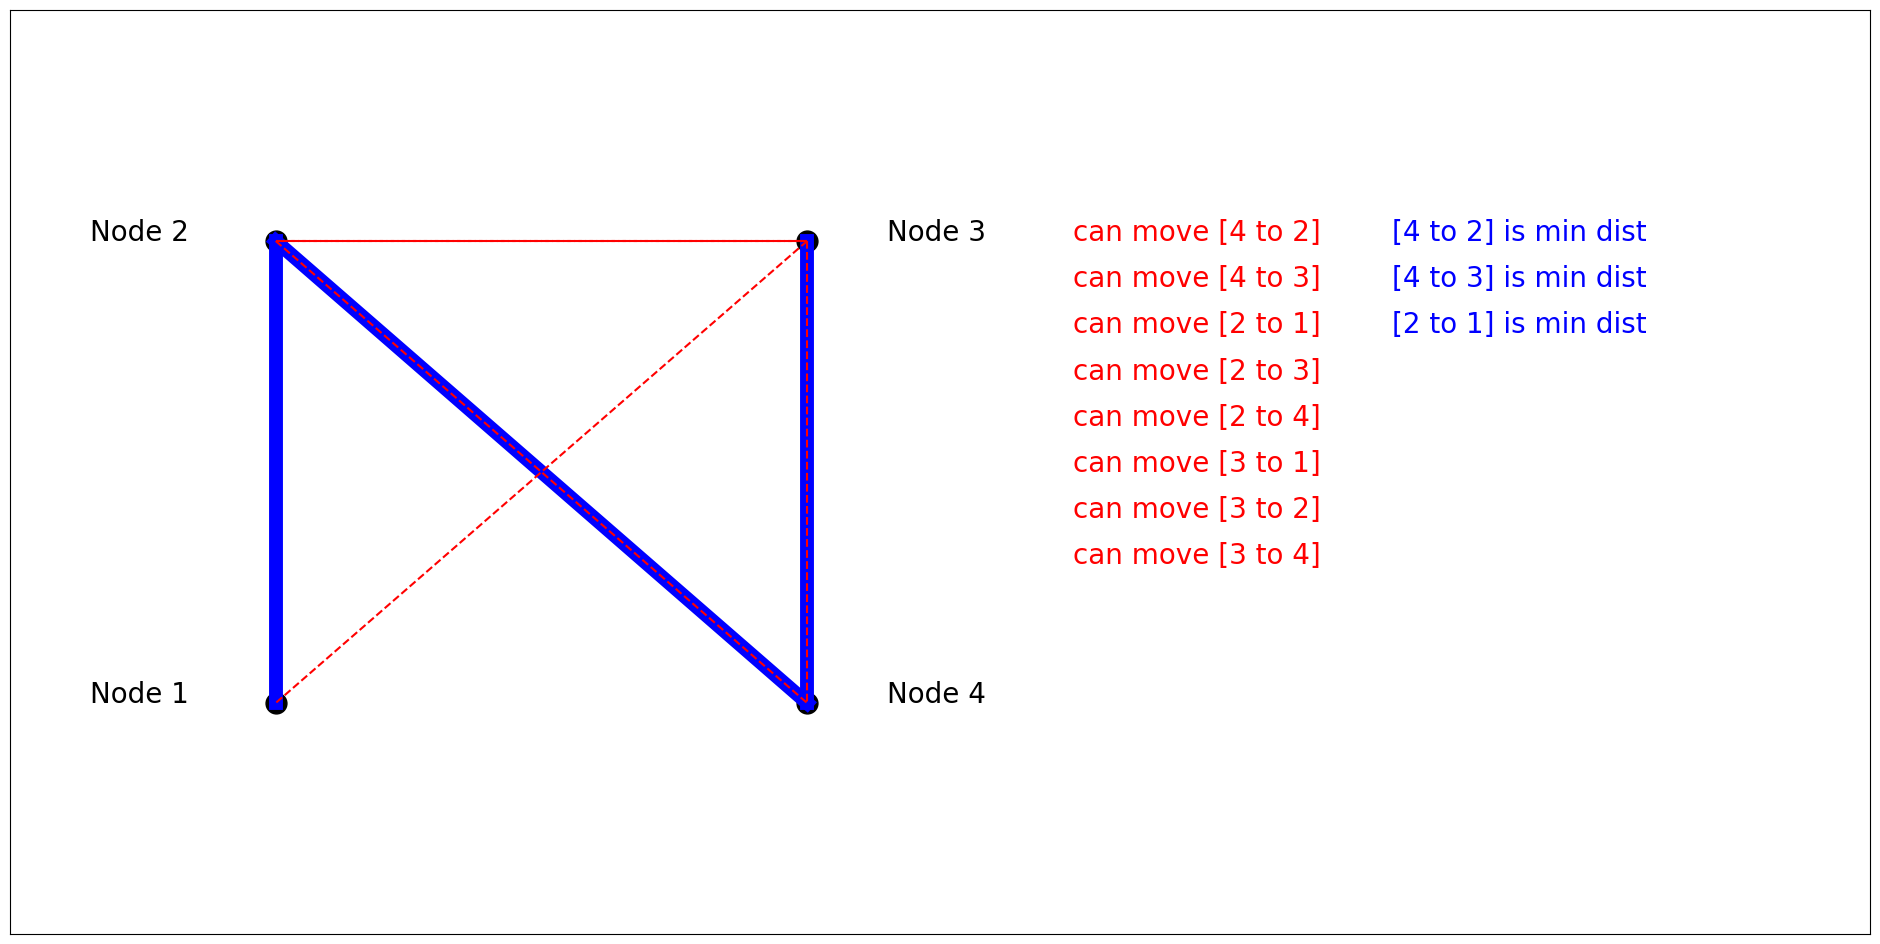

In [6]:
STOE = dijkstra(deepcopy(graph), E, S)
STOE_dist = STOE[S][1]

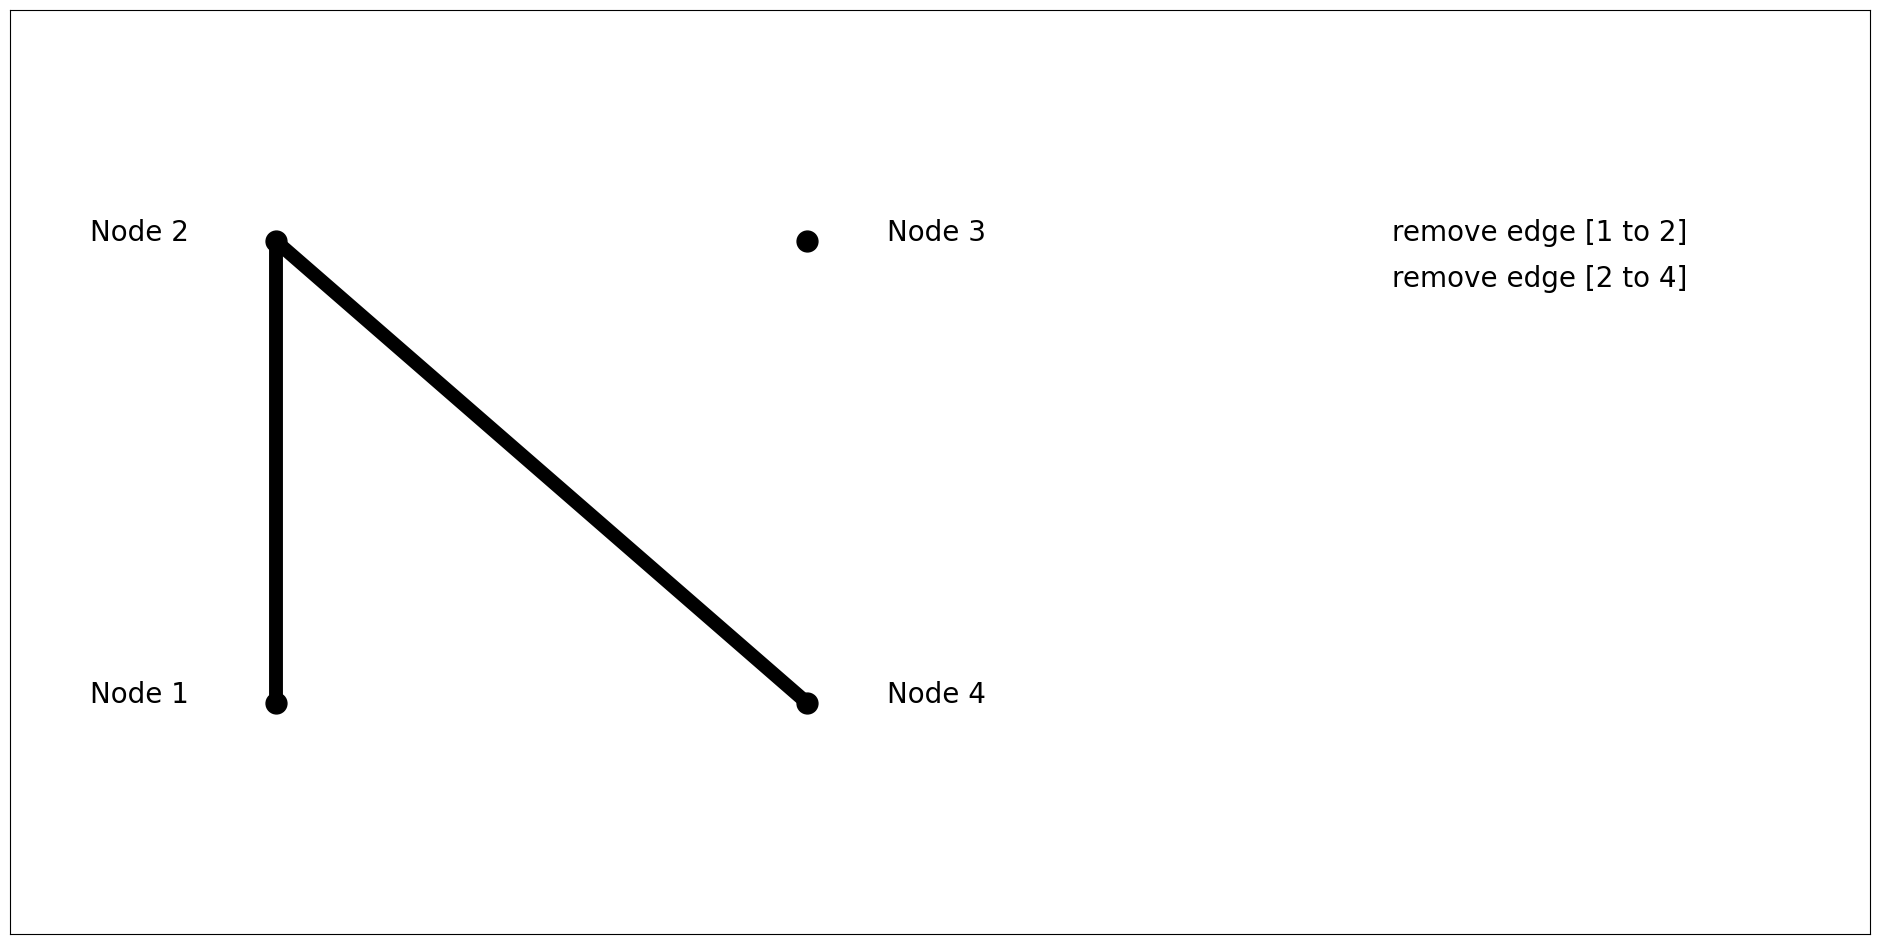

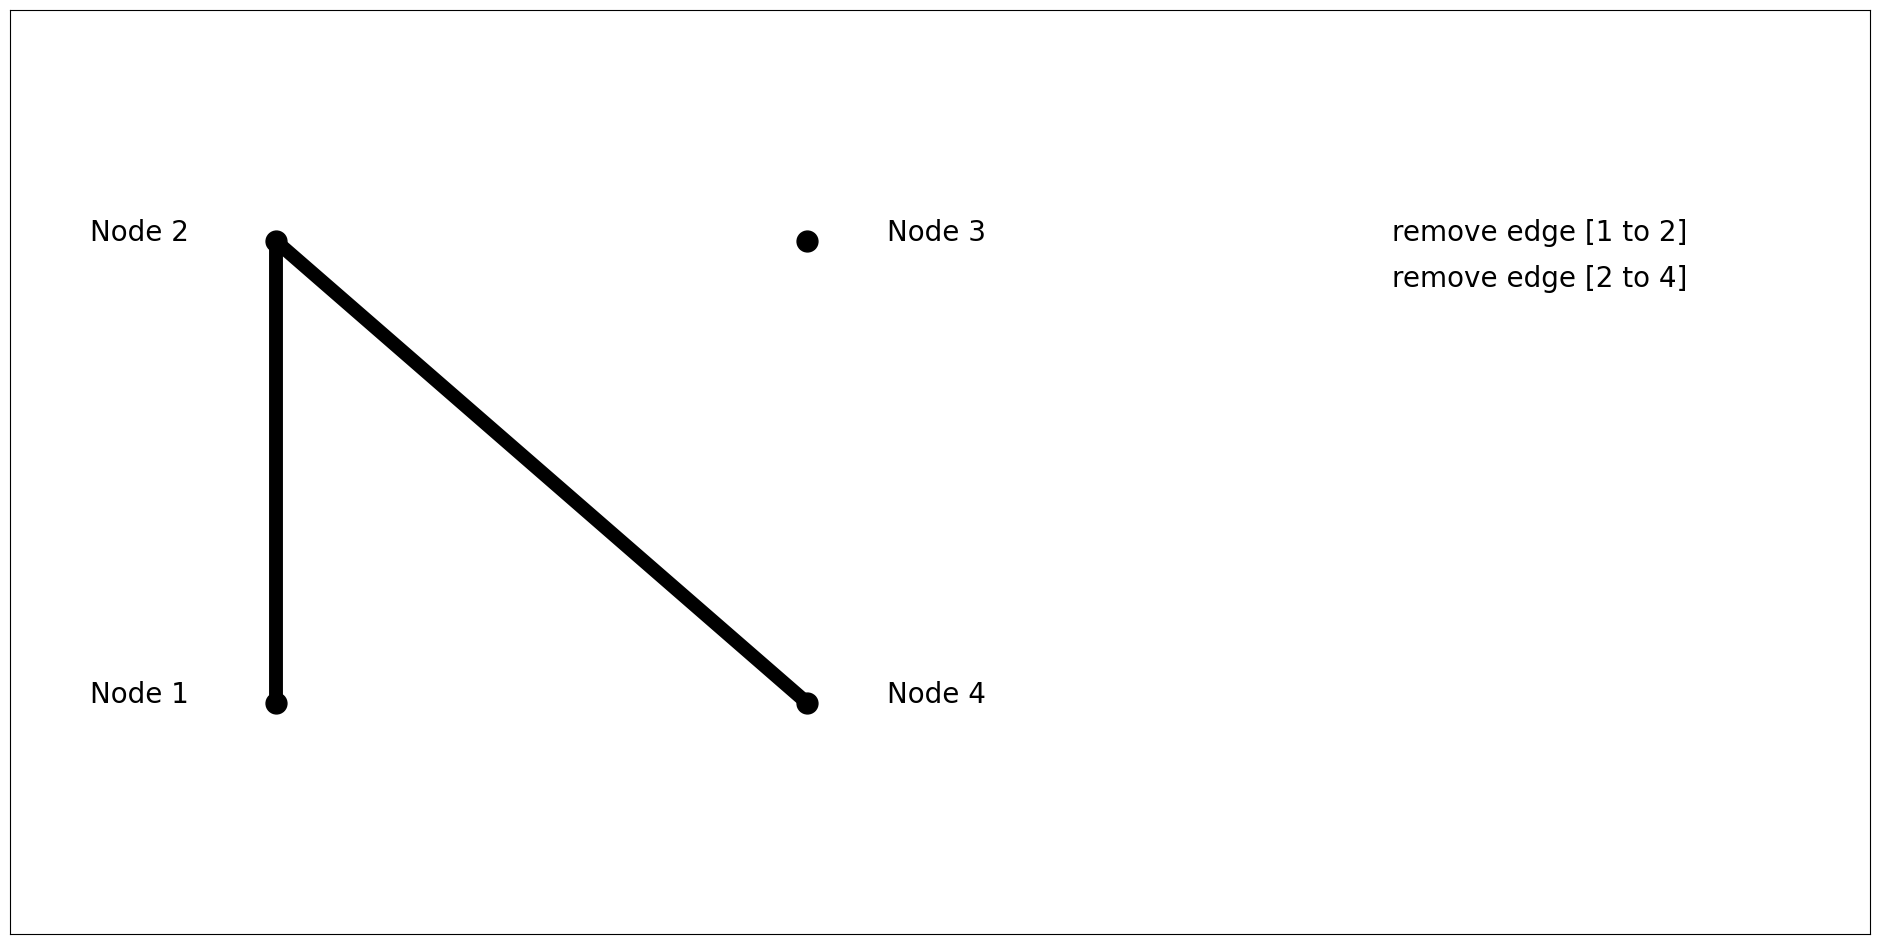

In [7]:
remove_nodes = []
now_node = S
is_remove_cnt = 0

# visualize set----------------------------------------------------------------
plt.figure(figsize=(24,12))
plt.xlim(-1, 6)
plt.ylim(-1, 3)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.plot(0, 0, 'k.', markersize=30)
plt.plot(0, 2, 'k.', markersize=30)
plt.plot(2, 2, 'k.', markersize=30)
plt.plot(2, 0, 'k.', markersize=30)

plt.text(-0.7, 0, 'Node 1', fontsize=20)
plt.text(-0.7, 2, 'Node 2', fontsize=20)
plt.text(2.3, 2, 'Node 3', fontsize=20)
plt.text(2.3, 0, 'Node 4', fontsize=20)

display.display(plt.gcf())
sleep(1)
# visualize set----------------------------------------------------------------


while(True):
    next_node = STOE[now_node][2]
    
    # visualize set----------------------------------------------------------------
    display.clear_output(wait=True)
    plt.plot([data_to_idx[now_node][0], data_to_idx[next_node][0]], \
             [data_to_idx[now_node][1], data_to_idx[next_node][1]], \
            'k-', linewidth=10)

    plt.text(4.2, 2-0.2*is_remove_cnt, f'remove edge [{now_node} to {next_node}]', color='black', fontsize=20)
    is_remove_cnt += 1
    
    display.display(plt.gcf())
    sleep(1)
    # visualize set----------------------------------------------------------------
    
    if next_node == E:
        break;
    remove_nodes.append(next_node)
    now_node = next_node

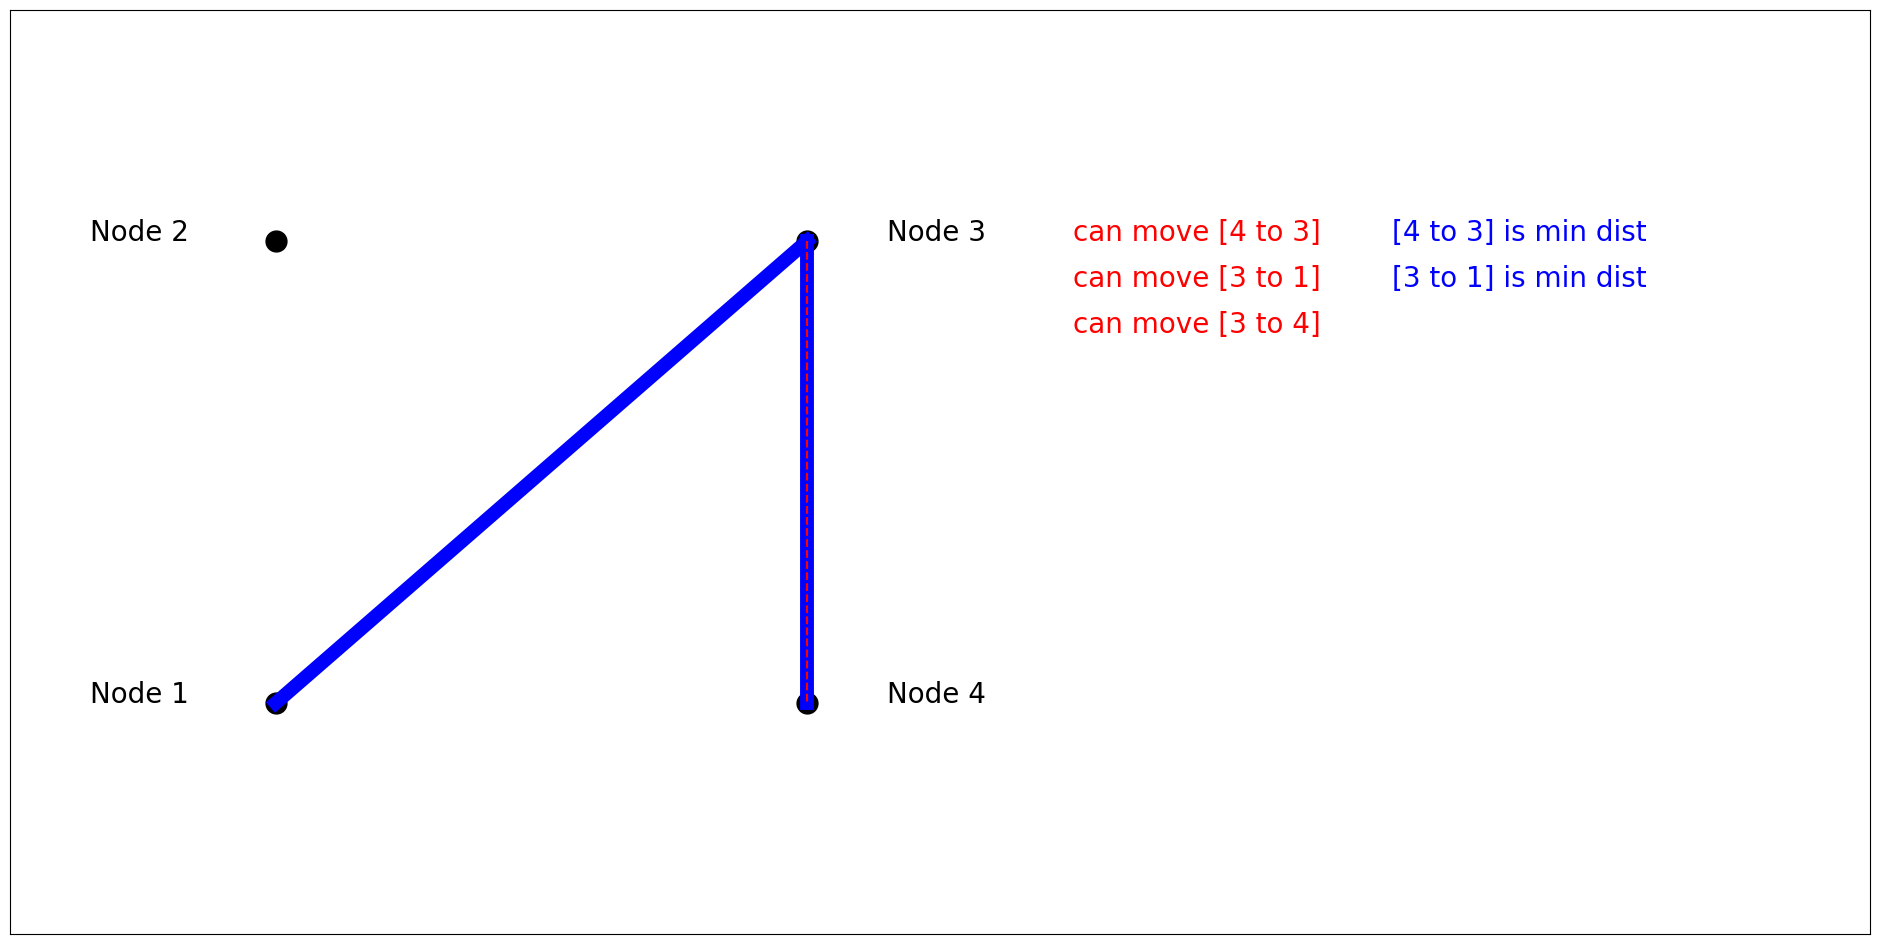

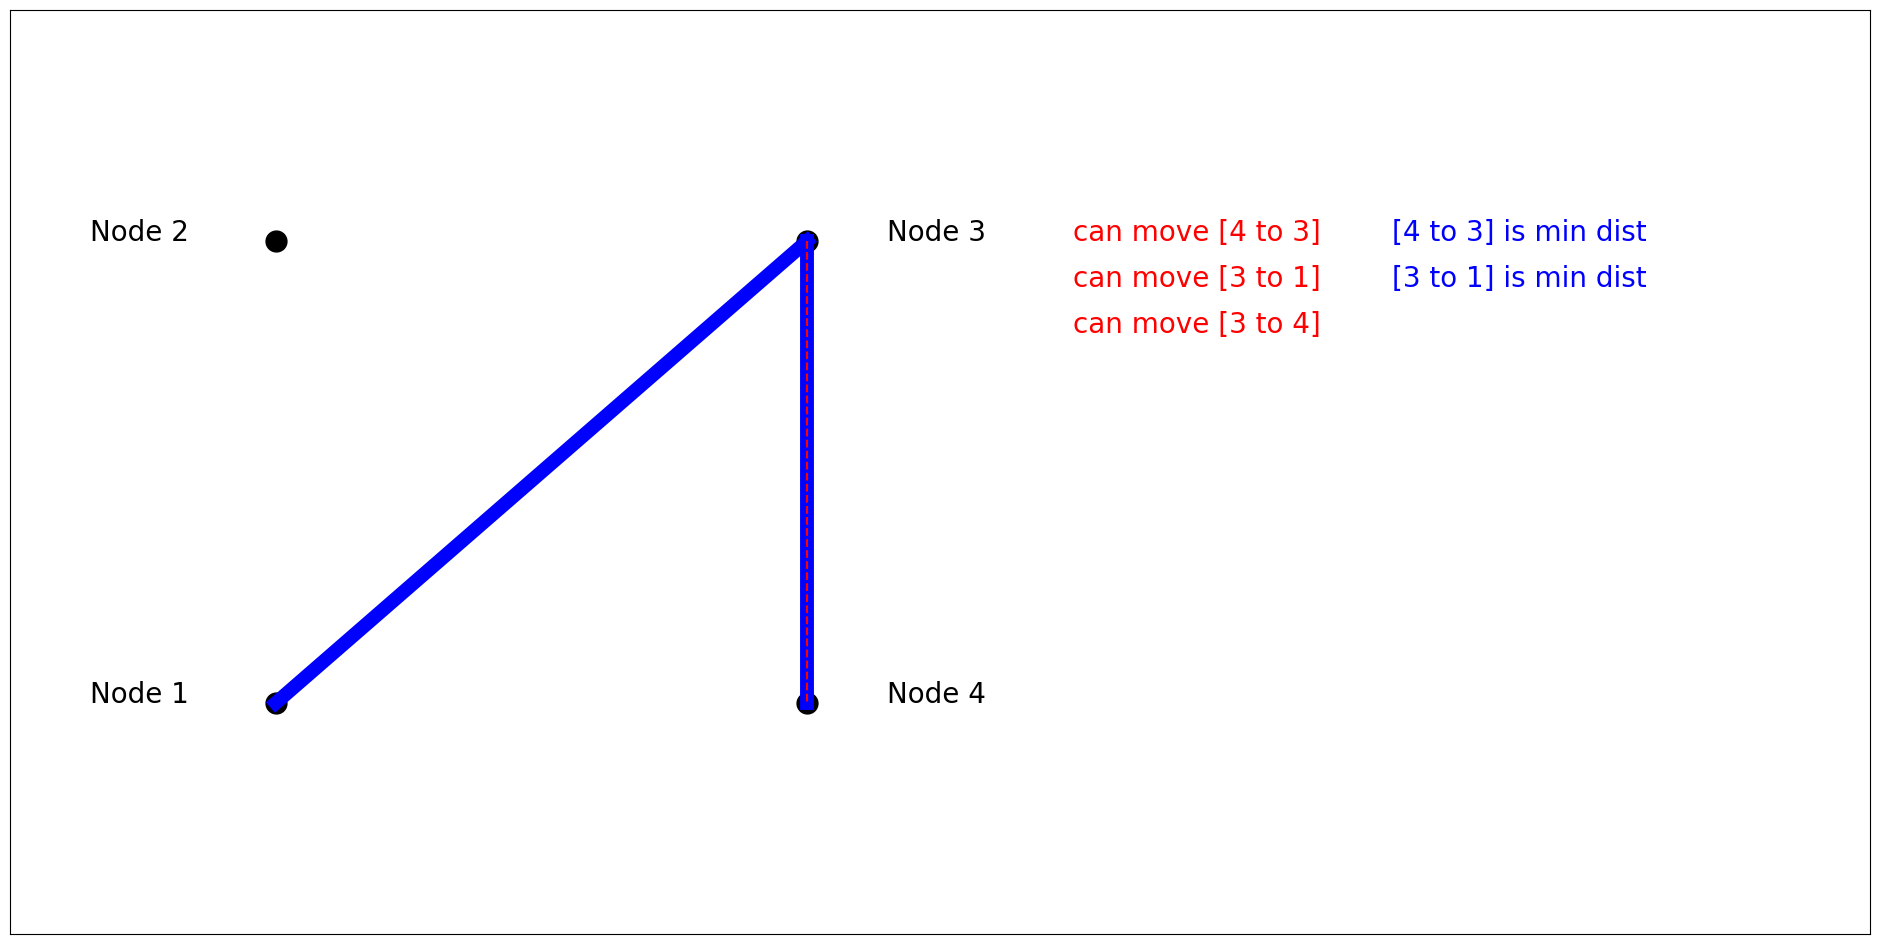

In [8]:
ETOS = dijkstra(graph, E, S, remove_nodes)
ETOS_dist = ETOS[S][1]

In [25]:
print(STOE_dist + ETOS_dist)

4
